In [1]:
!pip install imageio

In [13]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp
import cv2
import numpy as np
import scipy.ndimage

In [3]:
img = "https://i.pinimg.com/originals/4b/6f/0f/4b6f0f786d32460c3eb9b9f1c68dcf69.png"

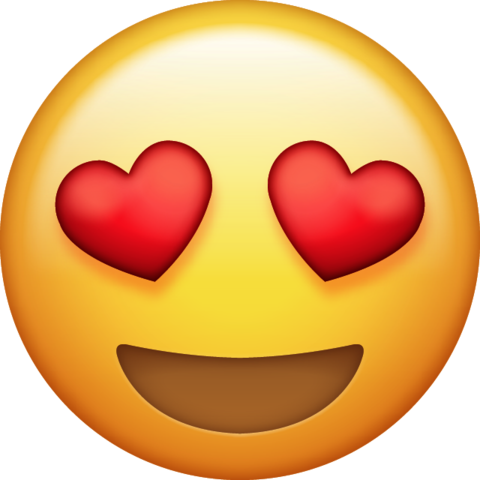

In [4]:
dp.Image(requests.get(img).content)

In [5]:
source_img = imageio.imread(img)

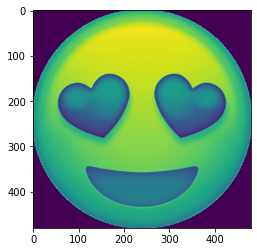

In [20]:
def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gray_scaled = grayscaleimg(source_img)
plt.imshow(gray_scaled)

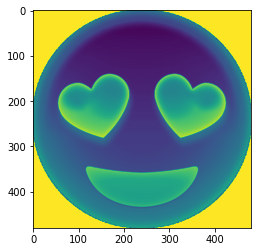

In [21]:
inv_img = (255 - gray_scaled)
plt.imshow(inv_img)

In [12]:
# formula of converting image to grayscale image
# formula Y = 0.299*R + 0.587*G + 0.114*B
# np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

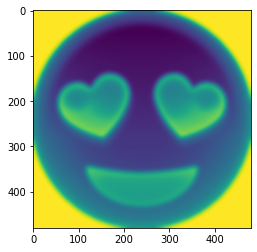

In [22]:
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [23]:
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [25]:
target_img= dodging(blurred_img, gray_scaled)

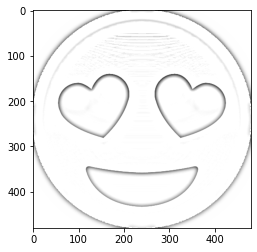

In [26]:
plt.imshow(target_img, cmap='gray')

In [27]:
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)

In [34]:
def pts(image):
  source_img = imageio.imread(image)
  def grayscaleimg(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

  gray_scaled = grayscaleimg(source_img)
  inv_img = (255 - gray_scaled)
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
  def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')
  target_img= dodging(blurred_img, gray_scaled)
  plt.subplot(1, 2, 1)
  plt.title('Original Image')
  plt.imshow(source_img)
  plt.subplot(1, 2, 2)
  plt.title('Result Image')
  plt.imshow(target_img, cmap='gray')
  plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)

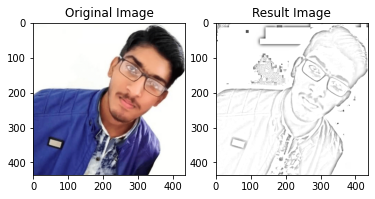

In [36]:
pts('https://avatars.githubusercontent.com/u/44013285?s=460&u=d044534296ee9b15266ba59f7329c9aa5e937b7a&v=4')